# MarkovChains.jl

MarkovChains.jl deals with the construction, visualization, solution of continous time Markov chains. In the following, we an exmample on how to use this pacakge. 

In [5]:
#Pkg.add("MarkovChains")
using MarkovChains

## Barbershop

A barbershop has two barbers. Each of them serves customers at rate $\mu$. Customers arrive at rate $\lambda$. The barbershop can hold up to 4 customers, including the ones being served. This example is essentially a M/M/2/4 queue. We parameterize it as follows: $\lambda = 3$, $\mu = 2$.

### Construction
The Markov chain can be constructed using the following code:

In [6]:
λ = 3
μ = 2

g = ContMarkovChain()

c0 = add_state!(g) #0 customer
c1 = add_state!(g) #1 customer
c2 = add_state!(g) #2 customer
c3 = add_state!(g) #3 customer
c4 = add_state!(g) #4 customer
#Alternatively, you can also initialize g with 5 states by g = ContMarkovChain(5). 
#Then, you can refer to these states by integer 1, 2, 3, 4, 5.

add_transition!(g, c0, c1, λ)
add_transition!(g, c1, c2, λ)
add_transition!(g, c2, c3, λ)
add_transition!(g, c3, c4, λ)
add_transition!(g, c4, c3, 2*μ)
add_transition!(g, c3, c2, 2*μ)
add_transition!(g, c2, c1, 2*μ)
add_transition!(g, c1, c0, μ);

### Visualization

The correctness of the construction can be easily verified using visualization: `plot_chain`.

Note that [TikzGraphs.jl](https://github.com/sisl/TikzGraphs.jl) is used to plot chains. It requires additonal software. Please refer to its [document](http://nbviewer.jupyter.org/github/sisl/TikzGraphs.jl/blob/master/doc/TikzGraphs.ipynb) for details.

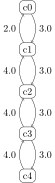

In [7]:
plot_chain(g;  state_labels=["c0", "c1", "c2", "c3", "c4"])

The transitions can be customly labeled with a `Dict`:

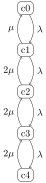

In [8]:
plot_chain(g; state_labels=["c0", "c1", "c2", "c3", "c4"], transition_labels=Dict(
    (c0, c1)=>raw"$\lambda$",
    (c1, c2)=>raw"$\lambda$",
    (c2, c3)=>raw"$\lambda$",
    (c3, c4)=>raw"$\lambda$",
    (c4, c3)=>raw"$2\mu$",
    (c3, c2)=>raw"$2\mu$",
    (c2, c1)=>raw"$2\mu$",
    (c1, c0)=>raw"$\mu$")
)

### Solution

Two kinds of measures are supported: 1) the probability of being at a state at time `t` or `Inf`; 2) the expected cumulative time spent in a state at time `t` or `Inf`. First we exam the steady state (at time `Inf`) behavior.

In [19]:
init_prob = sparsevec([c0], [1.0]) #starts with an empty barbershop
sol = solve(g, init_prob, Inf)
ss_probs = [state_prob(sol, s) for s in 1:state_count(g)]

5-element Array{Float64,1}:
 0.196018
 0.294028
 0.220521
 0.165391
 0.124043

Let's then exam how the probability of have 4 customers evolve over time. 

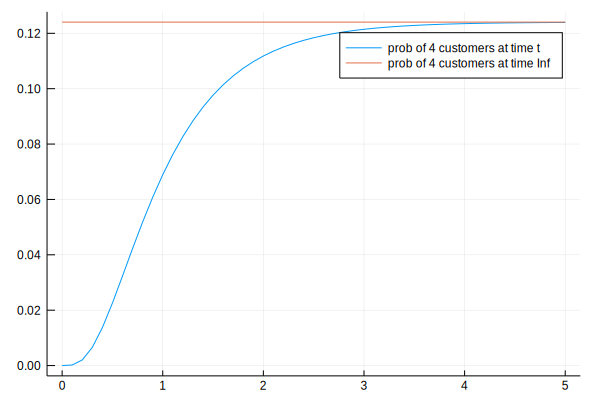

In [32]:
#Pkg.add("Plots")
using Plots

ts = 0:0.1:5
ts_prob4 = [state_prob(solve(g, init_prob, t), c4) for t in ts]
ss_prob4 = [ss_probs[c4] for _ in ts]
plot(ts,[ts_prob4, ss_prob4], labels=["prob of 4 customers at time t", "prob of 4 customers at time Inf"])

Moreover, we can exam how long the barbershop expects to stay empty for a day, assuming they open for 8 hours. 

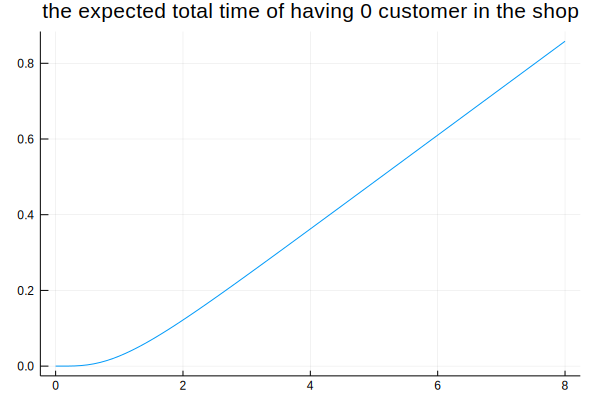

state_cumtime(solve(g, init_prob, 8), c4) = 0.8582330532402931


In [40]:
ts = 0:0.1:8
ts_cum0 = [state_cumtime(solve(g, init_prob, t), c4) for t in ts]
@show state_cumtime(solve(g, init_prob, 8), c4)
plot(ts,ts_cum0, title="the expected total time of having 0 customer in the shop ", labels="")

We see that at the end of the day, there's about 0.858 hour during which the shop stays empty.